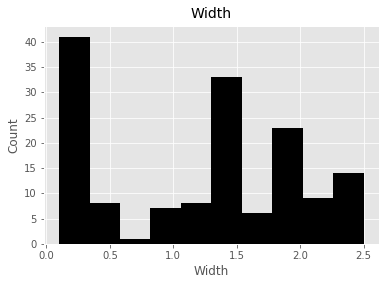

In [12]:
import requests
import os
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import numpy as np

# 1. 获取
def run1():
    r = requests.get(r'https://api.github.com/users/huowenxuan/starred')
    print(r.json())

# 2. 检查
# 2.1 IPython
# pip3 install ipython
# pip3 install jupyter
# jupyter notebook 从网页打开jupyter，右边new弹出下拉，选择Python3即可进入命令行运行

def get_iris():
    PATH = r'./outputs/iris/'
    filename = 'iris.data'
    # r = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data') # 已经保存在了./source_data/iris.data中，是一个CSV文件
    # with open(PATH + filename, 'w') as f:
    #     f.write(r.text)
    # pd解析文件，names设定列名，如果源文件有标题行，pandas会自动解析这一行
    # pd操作的基本单位是表格形式的数据列和行，数据列成为系列Series，表格成为数据框DataFrame
    return pd.read_csv(PATH + filename, names=['花萼长度', '花萼宽度', '花瓣长度', '花瓣宽度', '类别'])

# 2.2 pandas
def run2():
    df = get_iris()
    # 转换为表格
    df.head()
    # 通过列名获取这一行
    df['花萼长度']
    # .ix[row, column]前几行和前几列
    df.ix[:3, :2]
    # 条件查询，获取具备条件的列
    df.ix[:3, [x for x in df.columns if '宽度' in x]]
    # unique将获取到的值保存在set中，并返回set。也就是相同的值只选择其中一个
    df['类别'].unique()
    # 获取只包含Iris-virginica类的数据
    data = df[df['类别'] == 'Iris-virginica']
    # 获取结果的数量
    data.count()
    # 上面的数据保留了原始的索引，将这些数据保存到一个新的数据并重置索引
    data = data.reset_index(drop=True)
    # 添加条件
    data = df[(df['类别'] == 'Iris-virginica') & (df['花瓣宽度'] < 2.2)]
    # 描述性统计数据
    data = df.describe()
    # 传入自定义的百分比，获取更详细的信息
    data = df.describe(percentiles=[.20, .40, .80, .90, .95])
    # 查看特征之间的相关性。参数method="spearman" / "kendall"？ 不懂
    data = df.corr()

# 2.3 可视化
def run3():
    df = get_iris()
    fig, ax = plt.subplots(figsize=(6,4))
    ax.hist(df['花瓣宽度'], color='black')
    ax.set_ylabel('Count', fontsize=12)
    ax.set_xlabel('Width', fontsize=12)
    plt.title('Width', fontsize=14, y=1.01)

run3()

s
